In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import logging
import os
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
# Import from scripts
sys.path.append("..") 
from src.data_loader import load_tsla_data
from scripts.sarima import preprocess_data, train_sarima,forecast_sarima, evaluate_sarima,plot_sarima_results
                   
                   

In [6]:
data = load_tsla_data('../data/TSLA_cleaned.csv')  



2025-03-01 22:19:20,732 - INFO - Loading TSLA data from CSV...
2025-03-01 22:19:20,756 - INFO - Verifying TSLA data integrity...
2025-03-01 22:19:20,759 - INFO - TSLA data loaded successfully. Shape: (2505, 9), Missing values: 0


In [7]:
data = preprocess_data(data)
data.head() 

2025-03-01 22:19:33,012 - INFO - Preprocessing data - converting to business day frequency
2025-03-01 22:19:33,100 - INFO - New date range: 2015-02-17 00:00:00 to 2025-01-30 00:00:00


,Price,Close,High,Low,Volume,Daily_Return,Rolling_Mean,Rolling_Std,Z_Score
Date,,,,,,,,,
2015-02-17,13.623333,13.713333,13.433333,13.713333,59694000.0,-0.140787,13.940933,0.583636,-0.895868
2015-02-18,13.630667,13.744667,13.506667,13.611333,40704000.0,0.228492,13.917978,0.577107,-0.895605
2015-02-19,14.114000,14.162667,13.583333,13.666667,77311500.0,3.041181,13.914067,0.574963,-0.892099
2015-02-20,14.474000,14.506667,13.987333,14.052000,89731500.0,2.428920,13.920333,0.580523,-0.889213
2015-02-23,13.822667,14.546667,13.755333,14.377333,127497000.0,0.275735,13.930111,0.588737,-0.888878


2025-03-01 22:20:06,826 - INFO - Starting SARIMA model training
2025-03-01 22:20:06,831 - INFO - Training period: 2015-02-17 to 2024-12-31
2025-03-01 22:20:06,832 - INFO - Training samples: 2576
2025-03-01 22:20:06,837 - INFO - Performing seasonal decomposition


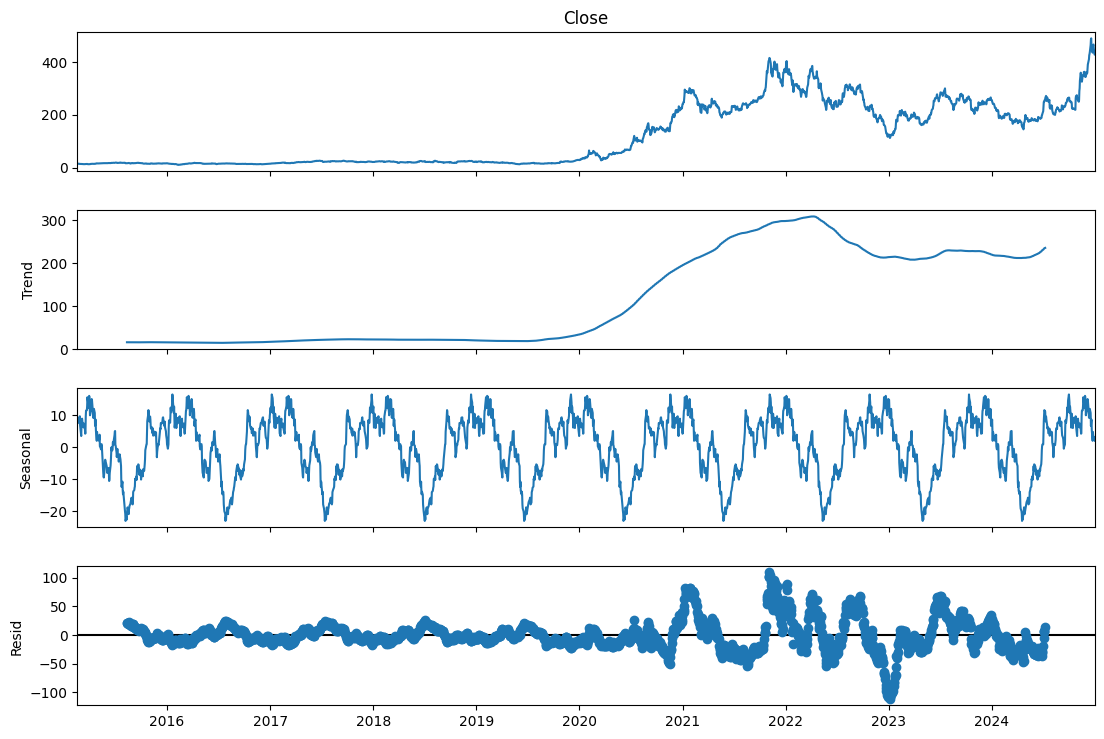

2025-03-01 22:20:07,722 - INFO - Seasonal strength: 8.09%
2025-03-01 22:20:07,744 - INFO - Optimizing SARIMA parameters with seasonal_period=63


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[63] intercept   : AIC=16061.023, Time=0.55 sec
 ARIMA(0,1,0)(0,0,0)[63] intercept   : AIC=16142.631, Time=0.17 sec
 ARIMA(1,1,0)(1,0,0)[63] intercept   : AIC=16071.937, Time=17.24 sec
 ARIMA(0,1,1)(0,0,1)[63] intercept   : AIC=16063.130, Time=21.86 sec
 ARIMA(0,1,0)(0,0,0)[63]             : AIC=16142.789, Time=0.15 sec
 ARIMA(1,1,1)(1,0,0)[63] intercept   : AIC=16062.859, Time=28.89 sec
 ARIMA(1,1,1)(0,0,1)[63] intercept   : AIC=16062.862, Time=31.87 sec
 ARIMA(1,1,1)(1,0,1)[63] intercept   : AIC=16064.696, Time=70.34 sec
 ARIMA(0,1,1)(0,0,0)[63] intercept   : AIC=16061.207, Time=0.43 sec
 ARIMA(1,1,0)(0,0,0)[63] intercept   : AIC=16069.943, Time=0.25 sec
 ARIMA(2,1,1)(0,0,0)[63] intercept   : AIC=16061.446, Time=1.00 sec
 ARIMA(1,1,2)(0,0,0)[63] intercept   : AIC=16062.160, Time=1.72 sec
 ARIMA(0,1,2)(0,0,0)[63] intercept   : AIC=16060.466, Time=0.78 sec
 ARIMA(0,1,2)(1,0,0)[63] intercept   : AIC=16062.268, Time=25.22 sec

2025-03-01 22:25:09,125 - INFO - Best SARIMA parameters: (0, 1, 2)(0, 0, 0, 63)
2025-03-01 22:25:09,284 - INFO - Model summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2576
Model:               SARIMAX(0, 1, 2)   Log Likelihood               -8027.083
Date:                Sat, 01 Mar 2025   AIC                          16060.166
Time:                        22:25:09   BIC                          16077.727
Sample:                    02-17-2015   HQIC                         16066.532
                         - 12-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1810      0.012     14.930      0.000       0.157       0.205
ma.

In [8]:
sarima_model, params = train_sarima(data)

In [9]:
test_data = data['2025-01-01':'2025-01-31']['Close']

In [10]:
forecast = forecast_sarima(sarima_model, test_data)

2025-03-01 22:25:09,448 - INFO - Generating 22-step forecast
2025-03-01 22:25:09,560 - INFO - Forecast completed successfully


In [11]:
evaluate_sarima(test_data, forecast)


2025-03-01 22:25:09,578 - INFO - Evaluating SARIMA model performance
2025-03-01 22:25:09,603 - INFO - SARIMA Evaluation - MAE: 15.31, RMSE: 18.87, MAPE: 3.76%


(15.309356427015269, 18.86787402290245, 3.7616566240759473)

2025-03-01 22:25:09,623 - INFO - Generating SARIMA results plot


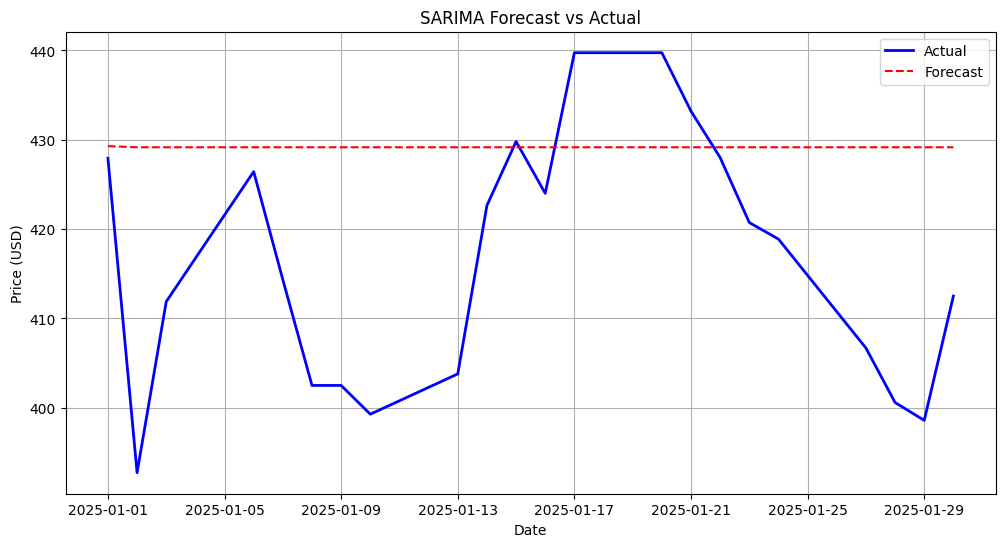

2025-03-01 22:25:10,007 - INFO - Plot generated successfully


In [12]:
plot_sarima_results(test_data, forecast)